# Chapter 3: Modern Neural Networks - Basic Operations

In this chapter, we presented several new operations and layers which form the core of modern convolutional neural networks. This short notebook illustrates these operations, applying them to a concrete image.

## Setup

In [27]:
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

Let us first open and display the image we will use as example:

In [28]:
image = cv2.imread("./res/bird_pic_by_benjamin_planche.png", cv2.IMREAD_GRAYSCALE)


In [29]:

image.shape

(680, 608)

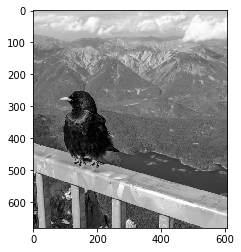

In [30]:
plt.imshow(image, cmap=plt.cm.gray)

We also already convert the image into a tensor:

In [31]:
image = tf.convert_to_tensor(image, tf.float32, name="input_image")

As most of the Tensorflow operations are meant for batched images, i.e., of shape `(B, H, W, D)` we will synthetically *expand* the dimensions of our image, to turn it into a batch of one single image:

In [32]:
image = tf.expand_dims(image, axis=0) # we expand our tensor, adding a dimension at position 0


In [33]:
image.shape


TensorShape([Dimension(1), Dimension(680), Dimension(608)])

Similarly, as our image is grayscale and have only one channel, it currently doesn't explicitely have a 4th depth dimension. We correct that by expanding our tensor again:


In [34]:
image = tf.expand_dims(image, axis=-1) # we expand our tensor, adding a dimension at position 0


In [35]:
image.shape

TensorShape([Dimension(1), Dimension(680), Dimension(608), Dimension(1)])

## Convolution

As presented in the book, the basic method for image convolution is `tf.nn.conv2()`. We will use it to reproduce the Figures 3 and 4 of the chapter.

In Figure 3, we define a 3x3 filter (or kernel) commonly used to blur images (*Gaussian* blur):

In [36]:
kernel = tf.constant([[1 / 16, 2 / 16, 1 / 16],
                      [2 / 16, 4 / 16, 2 / 16],
                      [1 / 16, 2 / 16, 1 / 16]], tf.float32, name="gaussian_kernel")


However, the convolution method requires the `filter` tensor to be of shape `(s, s, D, N)` (with `s` the filter size for square ones, and `N` the number of filters). Though `D = 1` and `N = 1` in our case, we still need to reshape our kernel to explicitely express those values:

In [37]:
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

To *filter* the image with our kernel, it is now just a matter of calling `tf.nn.conv2()`:


In [38]:
blurred_image = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding="SAME")


With our graph ready, we can now start a session and run the operations:


In [39]:
session = tf.Session() # we save our session in a variable to reuse it later

In [40]:
blurred_res = session.run(blurred_image)
# We "unbatch" our result by selecting the first (and only) image; we also remove the depth dimension:
blurred_res = blurred_res[0, ..., 0]

In Figure 4, a kernel for *contour detection* is used. This kernel is defined as follow:

In [41]:
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], tf.float32, name="edge_kernel")
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

This time, we use a larger stride to demonstrate how this affects the resulting tensors:

In [42]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 2, 2, 1], padding="SAME")
edge_res = session.run(edge_image)
# We "unbatch" our result by selecting the first (and only) image; we also remove the depth dimension:
edge_res = edge_res[0, ..., 0]

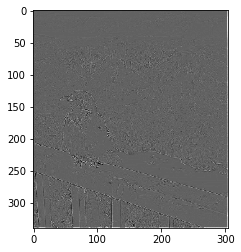

In [43]:
plt.imshow(edge_res, cmap=plt.cm.gray)

If you look closely, the image has a white border. This is caused by the zero-padding (since we chose padding `"SAME"`), detected as a contour by the kernel. Indeed, it disappears if we don't pad the image:

In [44]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 2, 2, 1], padding="VALID")
edge_res = session.run(edge_image)
edge_res = edge_res[0, ..., 0]


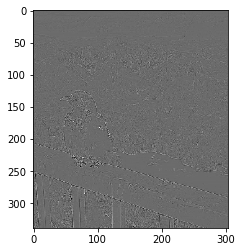

In [45]:
plt.imshow(edge_res, cmap=plt.cm.gray)


## Pooling

For max-pooling or average-pooling, the values in each window are aggregated into a single output, applying respectively the max or averaging operation. Once again, we use the low-level Tensorflow API to reproduce the results shown in the chapter:

In [46]:
avg_pooled_image = tf.nn.avg_pool(image, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
avg_res = session.run(avg_pooled_image)
avg_res = avg_res[0, ..., 0]

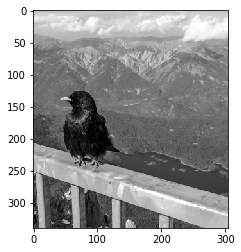

In [47]:
plt.imshow(avg_res, cmap=plt.cm.gray)

In [48]:
max_pooled_image = tf.nn.max_pool(image, ksize=[1, 10, 10, 1], strides=[1, 2, 2, 1], padding="SAME")
max_res = session.run(max_pooled_image)
max_res = max_res[0, ..., 0]

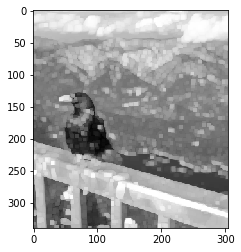

In [49]:
plt.imshow(max_res, cmap=plt.cm.gray)